It is used to get the derivative of a function.

There Are following four steps which we mainly follow to train a NN :
1. Forward Pass : for a given variable x calculate z (Z = wx+b) and then to get the Y_hat = f(z)   : feed z into activation function to get the Y_hat.
2.Calculate loss  : from Y_hat and Y calculate loss. Which is indirectly related to weight w and biase b.

3. Backward Calculation : To calculate : dL/dw : dl/dY_hat X dY_hat/dz X dz/dw
Similarly for dl/db
4.Update Gradient : One the back propagation is done then we update the w and b with the help of some optimization technique (Gradient Descent)

To do the above operation we are required to do derivation.

In [43]:
import torch

In [44]:
x = torch.tensor(3.0 , requires_grad = True)  # requires_grad = True to tell the torch that I am going to use it to calculate a derivative


In [45]:
y = x**2
y

tensor(9., grad_fn=<PowBackward0>)

In [46]:
# Calculate derivative :
y.backward(retain_graph=True)


In [47]:
x.grad

tensor(6.)

In [48]:
z = torch.sin(y)

In [49]:
x

tensor(3., requires_grad=True)

In [50]:
y

tensor(9., grad_fn=<PowBackward0>)

In [51]:
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [52]:
z.backward()

In [53]:
x.grad  # We can not calculate gradiant for intermediate notes i.e y , AutoGrad follows a DAG in which input is leaf and output is root. Thus derivative is calculated wrt leaf only

tensor(0.5332)

# Consider the following case : 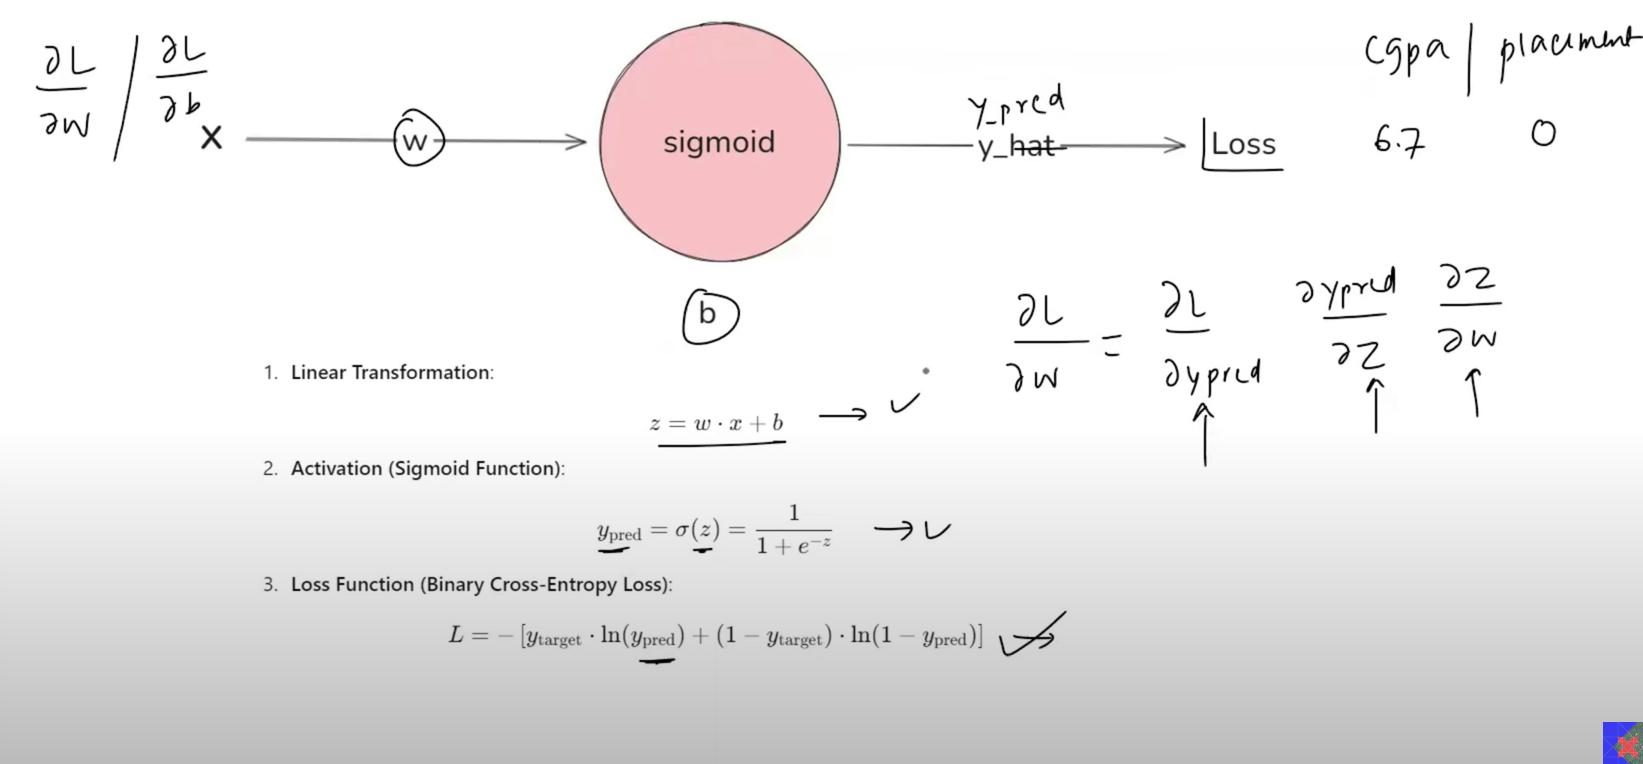

# Calculate Derivative of Following :
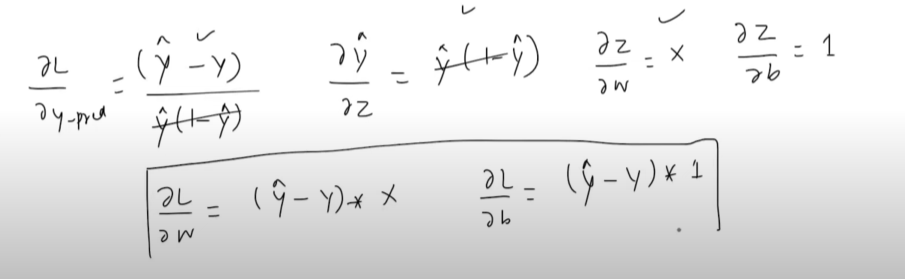

In [54]:
x = torch.tensor(6.7)   # input
y =torch.tensor(0.0)    #  output
w = torch.tensor(1.0)
b = torch.tensor(0.0)


In [55]:
# Function to calculate Loss:
def binary_cross_entropy(y_hat , y):
  delta = 1e-8 # to avoid log(0)
  y_hat  = torch.clamp(y_hat, min=delta, max=1-delta)  # to convert it into either 0 or 1
  return -y*torch.log(y_hat) - (1-y)*torch.log(1-y_hat)

In [56]:
# Forward Propagation
z = w*x + b
y_hat = torch.sigmoid(z)

loss= binary_cross_entropy(y_hat , y)

In [57]:
# Back Propagation
# Derivatives:
# 1. dL/d(y_hat): Loss with respect to the prediction (y_hat)
dloss_dy_hat = (y_hat - y)/(y_hat*(1-y_hat))

# 2. dy_hat/dz: Prediction (y_hat) with respect to z (sigmoid derivative)
dy_hat_dz = y_hat * (1 - y_hat)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_hat * dy_hat_dz * dz_dw
dL_db = dloss_dy_hat * dy_hat_dz * dz_db

In [58]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


### Now Do the same thing using Pytorch

In [59]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [60]:
w = torch.tensor(1.0, requires_grad=True)    # Since we need derivative wrt w and b thats why requires_grad is true of w and b only
b = torch.tensor(0.0, requires_grad=True)

In [61]:
w

tensor(1., requires_grad=True)

In [62]:
b

tensor(0., requires_grad=True)

In [63]:
# Forward Propagation
z = w*x + b
y_hat = torch.sigmoid(z)

In [64]:
loss = binary_cross_entropy(y_hat , y)
loss

tensor(6.7012, grad_fn=<SubBackward0>)

This is the DAG for following derivative
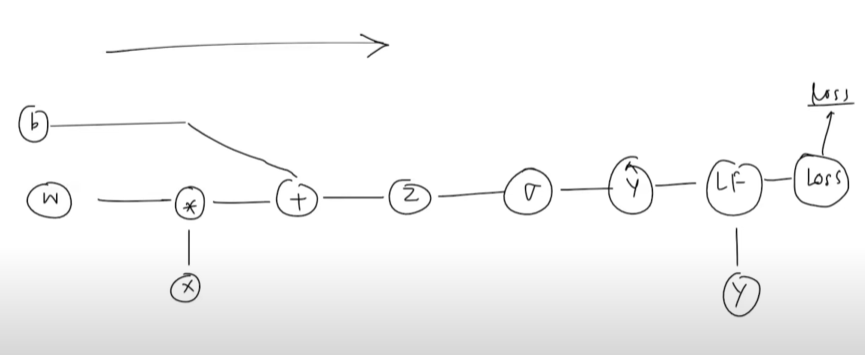



In [65]:
# Derivative
# for Backward
loss.backward(retain_graph=True)


In [66]:
w.grad

tensor(6.6918)

In [67]:
b.grad

tensor(0.9988)

Working with Some vectors

In [68]:
x = torch.tensor([1.0, 2.0, 3.0] , requires_grad=True)
x

tensor([1., 2., 3.], requires_grad=True)

In [69]:
y = (x**2).mean()

In [70]:
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [71]:
y.backward()

In [72]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [73]:
# Clearing Grad : initialize with 0 every time

In [74]:
x = torch.tensor([2.0] , requires_grad=True)
x

tensor([2.], requires_grad=True)

In [75]:
y = x**2
y

tensor([4.], grad_fn=<PowBackward0>)

In [76]:
y.backward()

In [77]:
x.grad.zero_()  # for clearing the grad

tensor([0.])

# Disable Gradient Tracking : We use it in the cases like once the training is done and if want some prediction from our model then this time we dont need calculate derivative again so in such cases we simply disable the gradient tracking becasue it unnecessary consumes memory.

In [78]:
# There are 3 ways to do so :
# Option 1 : requires_grad_(False)
# Option 2 : detach()
# Option 3 : torch.no_grad()

In [79]:
a = torch.tensor([2.0] , requires_grad=True)


In [80]:
b = a **2

In [81]:
b.backward()

In [82]:
a.grad

tensor([4.])

In [84]:
# Option 1:

a.requires_grad = False

In [86]:
a  # requires_grad=True is not showing

tensor([2.])

In [87]:
# Option 2:
z = x.detach() # make new variable
z

tensor([2.])

In [88]:
b1 = z**2
b1    # now it is not a backward gradient function

tensor([4.])

In [90]:
# Option 3 :
with torch.no_grad():
  b = a**2

b   # no backward function is there

tensor([4.])